In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from scipy.stats.stats import ttest_ind
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv(r'C:\Users\AP\Desktop\life expectancy.csv')

In [3]:
# sample view of dataset
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# basic size and shape of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

-------------------------------

1. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [5]:
# check for typos/extra spaces in columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# fix errors/rename columns
df.columns = ['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness 1-19 years', 'thinness 5-9 years',
       'income composition of resources', 'schooling']

In [7]:
# reorder columns by feature similarity
df = df[['life expectancy', 'country', 'year', 'status', 'population', 'gdp', 'total expenditure', 'percentage expenditure', 
         'income composition of resources', 'schooling', 'polio', 'measles', 'hepatitis b','diphtheria',
         'hiv/aids', 'thinness 5-9 years', 'thinness 1-19 years', 'bmi', 'infant deaths', 'under-five deaths', 
         'adult mortality', 'alcohol']]

In [9]:
# count and percentage missing nulls
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
population,652,0.221920
hepatitis b,553,0.188223
gdp,448,0.152485
total expenditure,226,0.076923
alcohol,194,0.066031
income composition of resources,167,0.056841
schooling,163,0.055480
bmi,34,0.011572
thinness 1-19 years,34,0.011572
thinness 5-9 years,34,0.011572


In [10]:
# drop nulls because missing data seems to be from smaller countries who may not report the info.
# replacing with mean or interpolation doesn't make sense.
df.dropna(inplace=True)

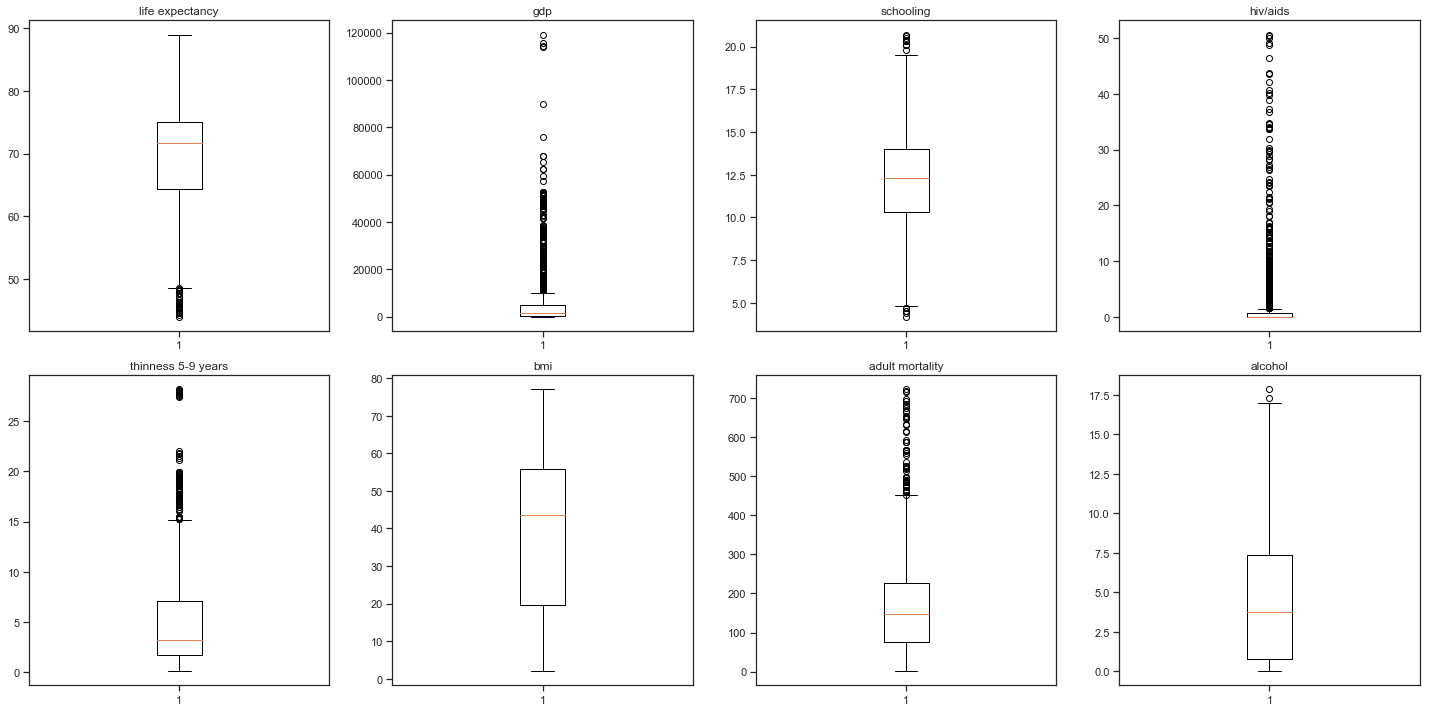

In [11]:
# boxplot key variables to detect outliers
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.boxplot(df['life expectancy'])
plt.title("life expectancy")

plt.subplot(2,4,2)
plt.boxplot(df['gdp'])
plt.title("gdp")

plt.subplot(2,4,3)
plt.boxplot(df['schooling'])
plt.title("schooling")

plt.subplot(2,4,4)
plt.boxplot(df['hiv/aids'])
plt.title("hiv/aids")
          
plt.subplot(2,4,5)
plt.boxplot(df['thinness 5-9 years'])
plt.title("thinness 5-9 years")
          
plt.subplot(2,4,6)
plt.boxplot(df['bmi'])
plt.title("bmi")
          
plt.subplot(2,4,7)
plt.boxplot(df['adult mortality'])
plt.title("adult mortality")
          
plt.subplot(2,4,8)
plt.boxplot(df['alcohol'])
plt.title("alcohol")

plt.tight_layout()
plt.show()

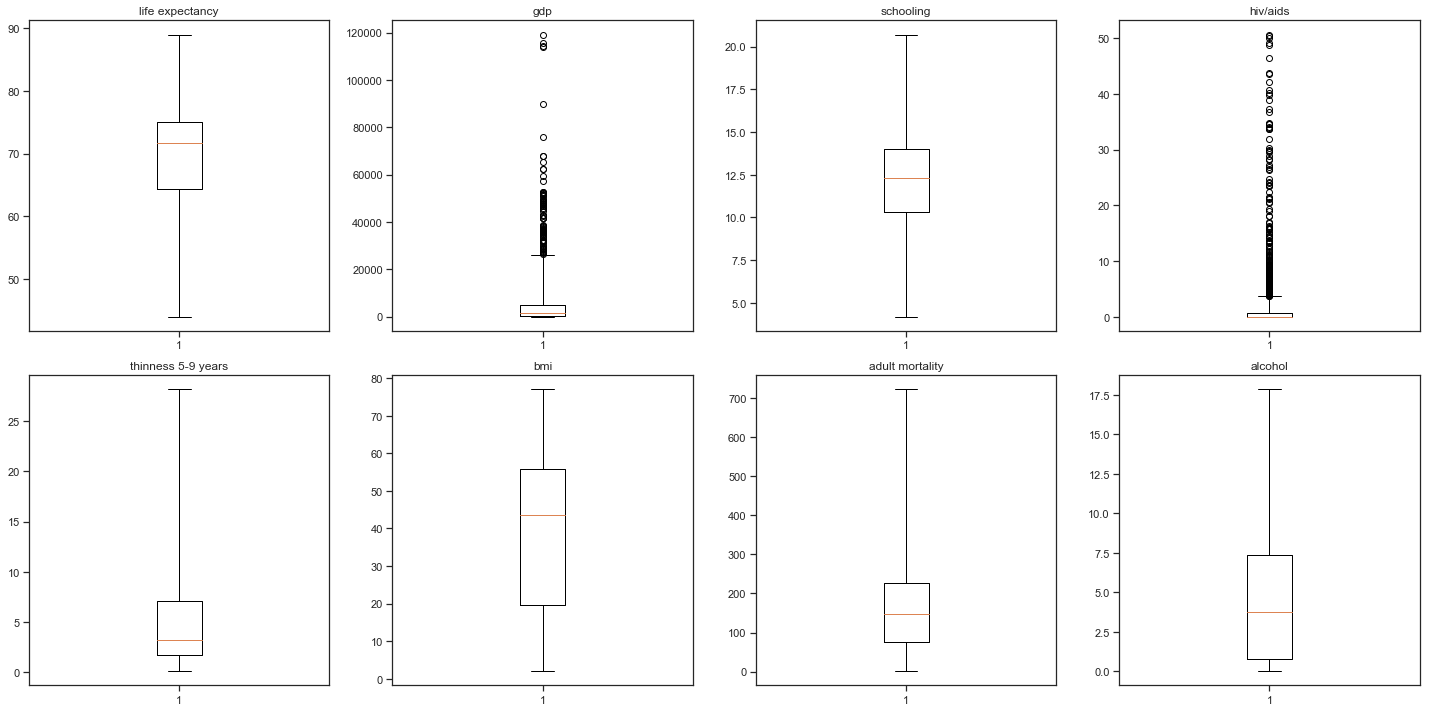

In [12]:
# boxplot key variables, whisker 5
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.boxplot(df['life expectancy'], whis=5)
plt.title("life expectancy")

plt.subplot(2,4,2)
plt.boxplot(df['gdp'], whis=5)
plt.title("gdp")

plt.subplot(2,4,3)
plt.boxplot(df['schooling'], whis=5)
plt.title("schooling")

plt.subplot(2,4,4)
plt.boxplot(df['hiv/aids'], whis=5)
plt.title("hiv/aids")
          
plt.subplot(2,4,5)
plt.boxplot(df['thinness 5-9 years'], whis=5)
plt.title("thinness 5-9 years")
          
plt.subplot(2,4,6)
plt.boxplot(df['bmi'], whis=5)
plt.title("bmi")
          
plt.subplot(2,4,7)
plt.boxplot(df['adult mortality'], whis=5)
plt.title("adult mortality")
          
plt.subplot(2,4,8)
plt.boxplot(df['alcohol'], whis=5)
plt.title("alcohol")

plt.tight_layout()
plt.show()

Outliers appear uniform and consistent, not the result of bogus data. Will keep outliers for now.

-------------------------

2. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [13]:
# unique values
df.nunique()

life expectancy                     320
country                             133
year                                 16
status                                2
population                         1647
gdp                                1649
total expenditure                   669
percentage expenditure             1645
income composition of resources     548
schooling                           147
polio                                68
measles                             603
hepatitis b                          83
diphtheria                           66
hiv/aids                            167
thinness 5-9 years                  185
thinness 1-19 years                 179
bmi                                 538
infant deaths                       165
under-five deaths                   199
adult mortality                     369
alcohol                             833
dtype: int64

In [14]:
# basic stats
df.describe()

,life expectancy,year,population,gdp,total expenditure,percentage expenditure,income composition of resources,schooling,polio,measles,hepatitis b,diphtheria,hiv/aids,thinness 5-9 years,thinness 1-19 years,bmi,infant deaths,under-five deaths,adult mortality,alcohol
count,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,2007.840509,1.465363e+07,5566.031887,5.955925,698.973558,0.631551,12.119891,83.564585,2224.494239,79.217708,84.155246,1.983869,4.907762,4.850637,38.128623,32.553062,44.220133,168.215282,4.533196
std,8.796834,4.087711,7.046039e+07,11475.900117,2.299385,1759.229336,0.183089,2.795388,22.450557,10085.802019,25.604664,21.579193,6.032360,4.653757,4.599228,19.754249,120.847190,162.897999,125.310417,4.029189
min,44.000000,2000.000000,3.400000e+01,1.681350,0.740000,0.000000,0.000000,4.200000,3.000000,0.000000,2.000000,2.000000,0.100000,0.100000,0.100000,2.000000,0.000000,0.000000,1.000000,0.010000
25%,64.400000,2005.000000,1.918970e+05,462.149650,4.410000,37.438577,0.509000,10.300000,81.000000,0.000000,74.000000,82.000000,0.100000,1.700000,1.600000,19.500000,1.000000,1.000000,77.000000,0.810000
50%,71.700000,2008.000000,1.419631e+06,1592.572182,5.840000,145.102253,0.673000,12.300000,93.000000,15.000000,89.000000,92.000000,0.100000,3.200000,3.000000,43.700000,3.000000,4.000000,148.000000,3.790000
75%,75.000000,2011.000000,7.658972e+06,4718.512910,7.470000,509.389994,0.751000,14.000000,97.000000,373.000000,96.000000,97.000000,0.700000,7.100000,7.100000,55.800000,22.000000,29.000000,227.000000,7.340000
max,89.000000,2015.000000,1.293859e+09,119172.741800,14.390000,18961.348600,0.936000,20.700000,99.000000,131441.000000,99.000000,99.000000,50.600000,28.200000,27.200000,77.100000,1600.000000,2100.000000,723.000000,17.870000


In [15]:
# correlation table
df.corr()

,life expectancy,year,population,gdp,total expenditure,percentage expenditure,income composition of resources,schooling,polio,measles,hepatitis b,diphtheria,hiv/aids,thinness 5-9 years,thinness 1-19 years,bmi,infant deaths,under-five deaths,adult mortality,alcohol
life expectancy,1.000000,0.050771,-0.022305,0.441322,0.174718,0.409631,0.721083,0.727630,0.327294,-0.068881,0.199935,0.341331,-0.592236,-0.457508,-0.457838,0.542042,-0.169074,-0.192265,-0.702523,0.402718
year,0.050771,1.000000,0.012567,0.096421,0.059493,0.069553,0.122892,0.088732,-0.016699,-0.053822,0.114897,0.029641,-0.123405,0.014122,0.019757,0.005739,0.008029,0.010479,-0.037092,-0.113365
population,-0.022305,0.012567,1.000000,-0.020369,-0.079962,-0.016792,-0.008132,-0.040312,-0.045387,0.321946,-0.129723,-0.039898,-0.027801,0.277913,0.282529,-0.081416,0.671758,0.658680,-0.015012,-0.028880
gdp,0.441322,0.096421,-0.020369,1.000000,0.180373,0.959299,0.446856,0.467947,0.156809,-0.064768,0.041850,0.158438,-0.108081,-0.277959,-0.277498,0.266114,-0.098092,-0.100331,-0.255035,0.443433
total expenditure,0.174718,0.059493,-0.079962,0.180373,1.000000,0.183872,0.183653,0.243783,0.119768,-0.113583,0.113327,0.129915,0.043101,-0.217865,-0.209872,0.189469,-0.146951,-0.145803,-0.085227,0.214885
percentage expenditure,0.409631,0.069553,-0.016792,0.959299,0.183872,1.000000,0.402170,0.422088,0.128626,-0.063071,0.016760,0.134813,-0.095085,-0.255635,-0.255035,0.242738,-0.090765,-0.092158,-0.237610,0.417047
income composition of resources,0.721083,0.122892,-0.008132,0.446856,0.183653,0.402170,1.000000,0.784741,0.314682,-0.058277,0.184921,0.343262,-0.248590,-0.438484,-0.453679,0.510505,-0.134754,-0.148097,-0.442203,0.561074
schooling,0.727630,0.088732,-0.040312,0.467947,0.243783,0.422088,0.784741,1.000000,0.350147,-0.115660,0.215182,0.350398,-0.211840,-0.472482,-0.491199,0.554844,-0.214372,-0.226013,-0.421171,0.616975
polio,0.327294,-0.016699,-0.045387,0.156809,0.119768,0.128626,0.314682,0.350147,1.000000,-0.057850,0.463331,0.609245,-0.107885,-0.174489,-0.164070,0.186268,-0.156929,-0.171164,-0.199853,0.240315
measles,-0.068881,-0.053822,0.321946,-0.064768,-0.113583,-0.063071,-0.058277,-0.115660,-0.057850,1.000000,-0.124800,-0.058606,-0.003522,0.174946,0.180642,-0.153245,0.532680,0.517506,-0.003967,-0.050110


From this correlation table, I will immediately eliminate any feature that has a low or close to zero correlation with the target variable life expectancy. This gets rid of year, population, total expenditure, polio, measles, hepatitis b, diphtheria, infant deaths, and under-five deaths.  

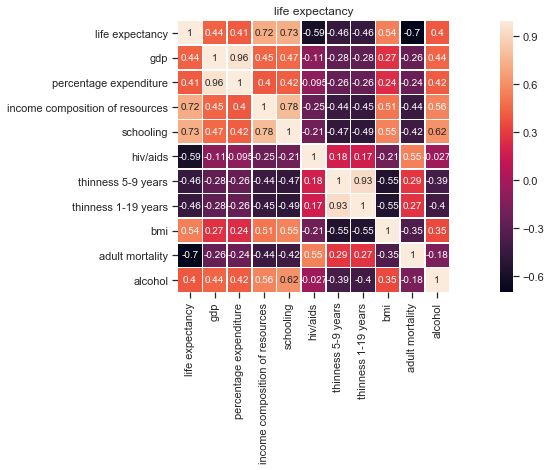

In [16]:
# eliminated features that were near zero (-0.4 - 0.4) or highly correlated with each other
# kept features that have high positive or negative correlation with target variable life expectancy

# new correlation matrix
corr_life = df[['life expectancy', 'gdp', 'percentage expenditure', 'income composition of resources', 'schooling',
                   'hiv/aids', 'thinness 5-9 years', 'thinness 1-19 years', 'bmi', 'adult mortality', 'alcohol']].corr()

plt.figure(figsize=(18,5))

sns.heatmap(corr_life, square=True, annot=True, linewidths=.5)
plt.title("life expectancy")

plt.show()

Thinness 5-9 and thinness 1-19 years are almost equal in their correlation with the target variable life expectancy and also highly correlated with each other. I will eliminate thinness 1-19 years and keep only 5-9 years. 

Income composition of resources and schooling are almost equal in their correlation to life expectancy and also highly correlated with each other. I will eliminate income composition and keep schooling. 

GDP and percentage expenditure are both somewhat correlated with life expectancy and also highly correlated with each other. I will eliminate percentage expenditure and keep gdp because of its higher correlation with target variable.

In [17]:
# new correlation table

df[['life expectancy', 'gdp', 'schooling','hiv/aids',
    'thinness 5-9 years', 'bmi', 'adult mortality', 'alcohol']].corr()

,life expectancy,gdp,schooling,hiv/aids,thinness 5-9 years,bmi,adult mortality,alcohol
life expectancy,1.000000,0.441322,0.727630,-0.592236,-0.457508,0.542042,-0.702523,0.402718
gdp,0.441322,1.000000,0.467947,-0.108081,-0.277959,0.266114,-0.255035,0.443433
schooling,0.727630,0.467947,1.000000,-0.211840,-0.472482,0.554844,-0.421171,0.616975
hiv/aids,-0.592236,-0.108081,-0.211840,1.000000,0.183147,-0.210897,0.550691,-0.027113
thinness 5-9 years,-0.457508,-0.277959,-0.472482,0.183147,1.000000,-0.554094,0.286723,-0.386208
bmi,0.542042,0.266114,0.554844,-0.210897,-0.554094,1.000000,-0.351542,0.353396
adult mortality,-0.702523,-0.255035,-0.421171,0.550691,0.286723,-0.351542,1.000000,-0.175535
alcohol,0.402718,0.443433,0.616975,-0.027113,-0.386208,0.353396,-0.175535,1.000000


All features are positively or negatively correlated with target variable life expectancy and are not highly correlated with each other. 

In [18]:
# new dataframe containing features
df_1 = df[['life expectancy', 'gdp', 'schooling','hiv/aids',
    'thinness 5-9 years', 'bmi', 'adult mortality', 'alcohol']]

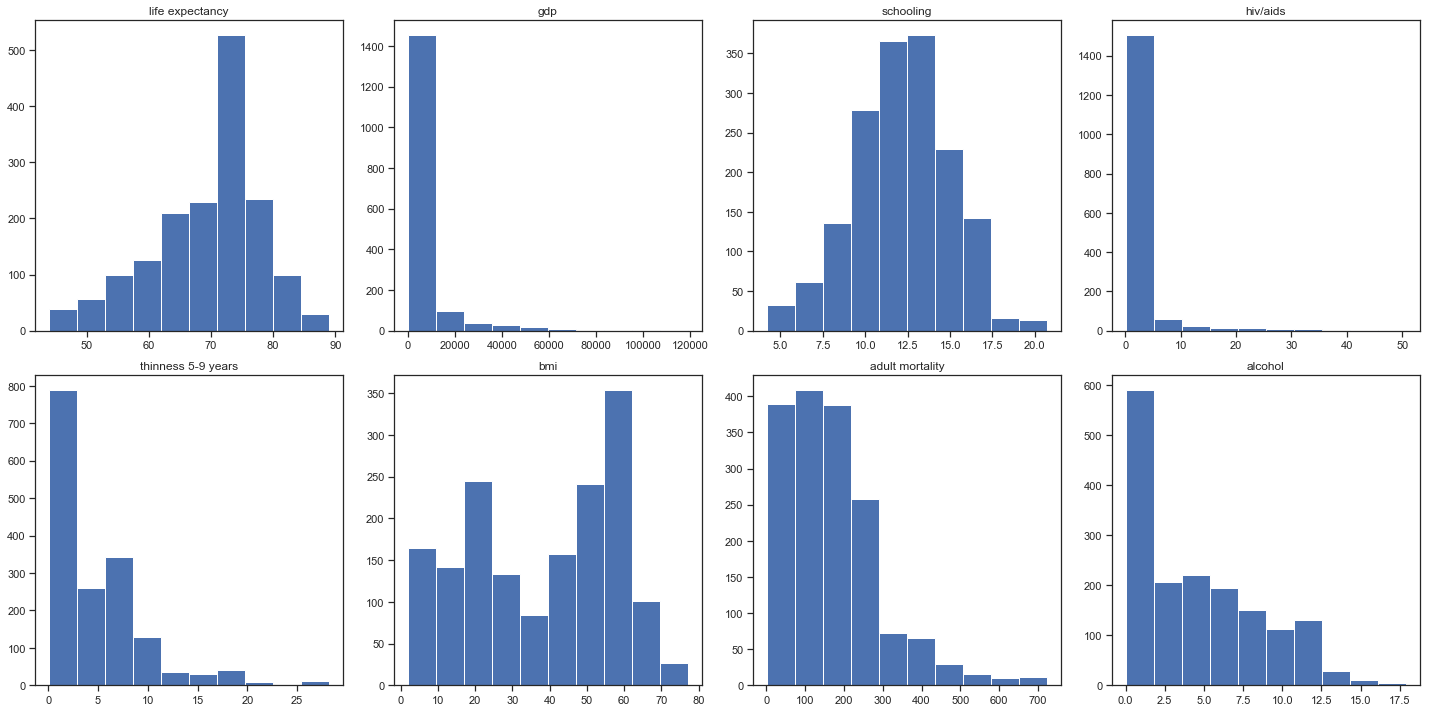

In [19]:
# histograms key variable distributions
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(df_1['life expectancy'])
plt.title("life expectancy")

plt.subplot(2,4,2)
plt.hist(df_1['gdp'])
plt.title("gdp")

plt.subplot(2,4,3)
plt.hist(df_1['schooling'])
plt.title("schooling")

plt.subplot(2,4,4)
plt.hist(df_1['hiv/aids'])
plt.title("hiv/aids")
          
plt.subplot(2,4,5)
plt.hist(df_1['thinness 5-9 years'])
plt.title("thinness 5-9 years")
          
plt.subplot(2,4,6)
plt.hist(df_1['bmi'])
plt.title("bmi")
          
plt.subplot(2,4,7)
plt.hist(df_1['adult mortality'])
plt.title("adult mortality")
          
plt.subplot(2,4,8)
plt.hist(df_1['alcohol'])
plt.title("alcohol")

plt.tight_layout()
plt.show()

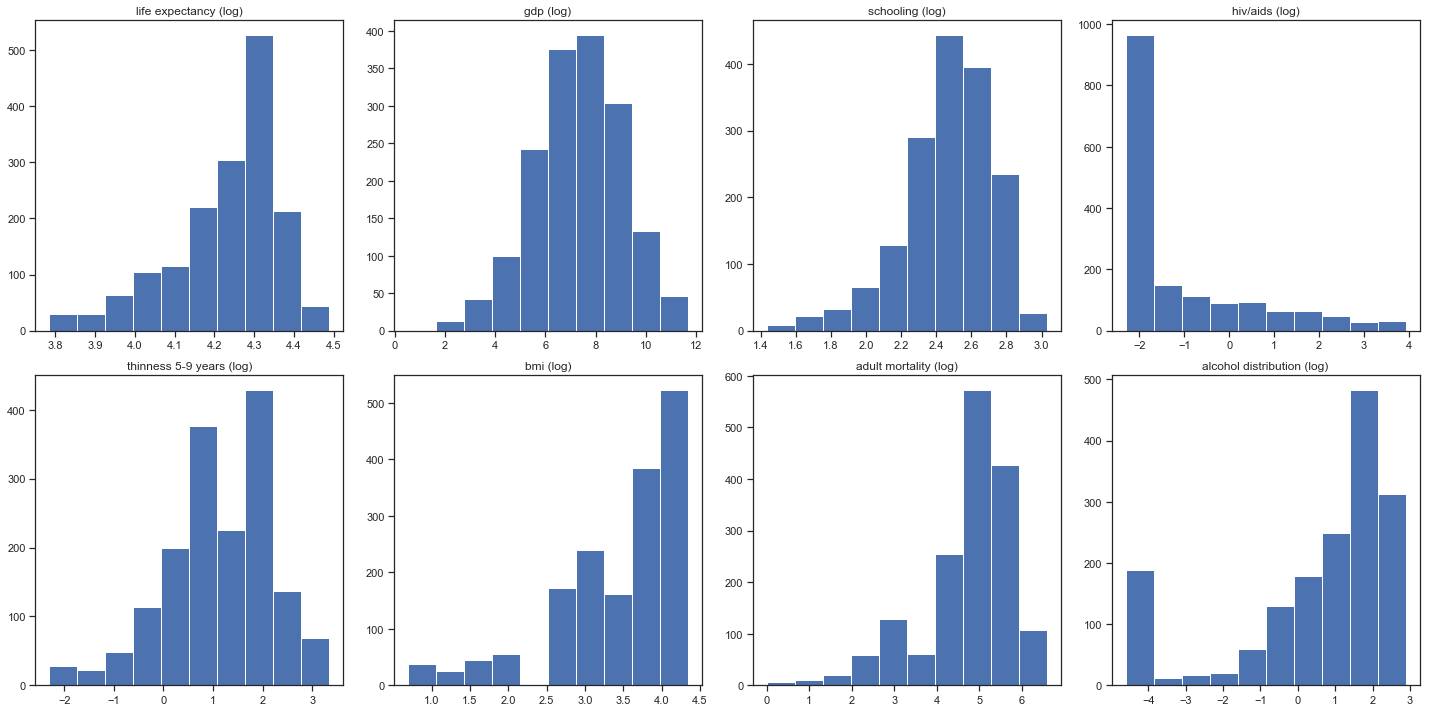

In [20]:
# create log variables
log_life_exp = [np.log(i) for i in df['life expectancy']]
log_gdp = [np.log(i) for i in df['gdp']]
log_schooling = [np.log(i) for i in df['schooling']]
log_aids = [np.log(i) for i in df['hiv/aids']]
log_thinness = [np.log(i) for i in df['thinness 5-9 years']]
log_bmi = [np.log(i) for i in df['bmi']]
log_adult_mort = [np.log(i) for i in df['adult mortality']]
log_alcohol = [np.log(i) for i in df['alcohol']]

# histograms of log transformed variable distributions
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(log_life_exp)
plt.title("life expectancy (log)")

plt.subplot(2,4,2)
plt.hist(log_gdp)
plt.title("gdp (log)")

plt.subplot(2,4,3)
plt.hist(log_schooling)
plt.title("schooling (log)")

plt.subplot(2,4,4)
plt.hist(log_aids)
plt.title("hiv/aids (log)")
          
plt.subplot(2,4,5)
plt.hist(log_thinness)
plt.title("thinness 5-9 years (log)")
          
plt.subplot(2,4,6)
plt.hist(log_bmi)
plt.title("bmi (log)")
          
plt.subplot(2,4,7)
plt.hist(log_adult_mort)
plt.title("adult mortality (log)")
          
plt.subplot(2,4,8)
plt.hist(log_alcohol)
plt.title("alcohol distribution (log)")

plt.tight_layout()
plt.show()

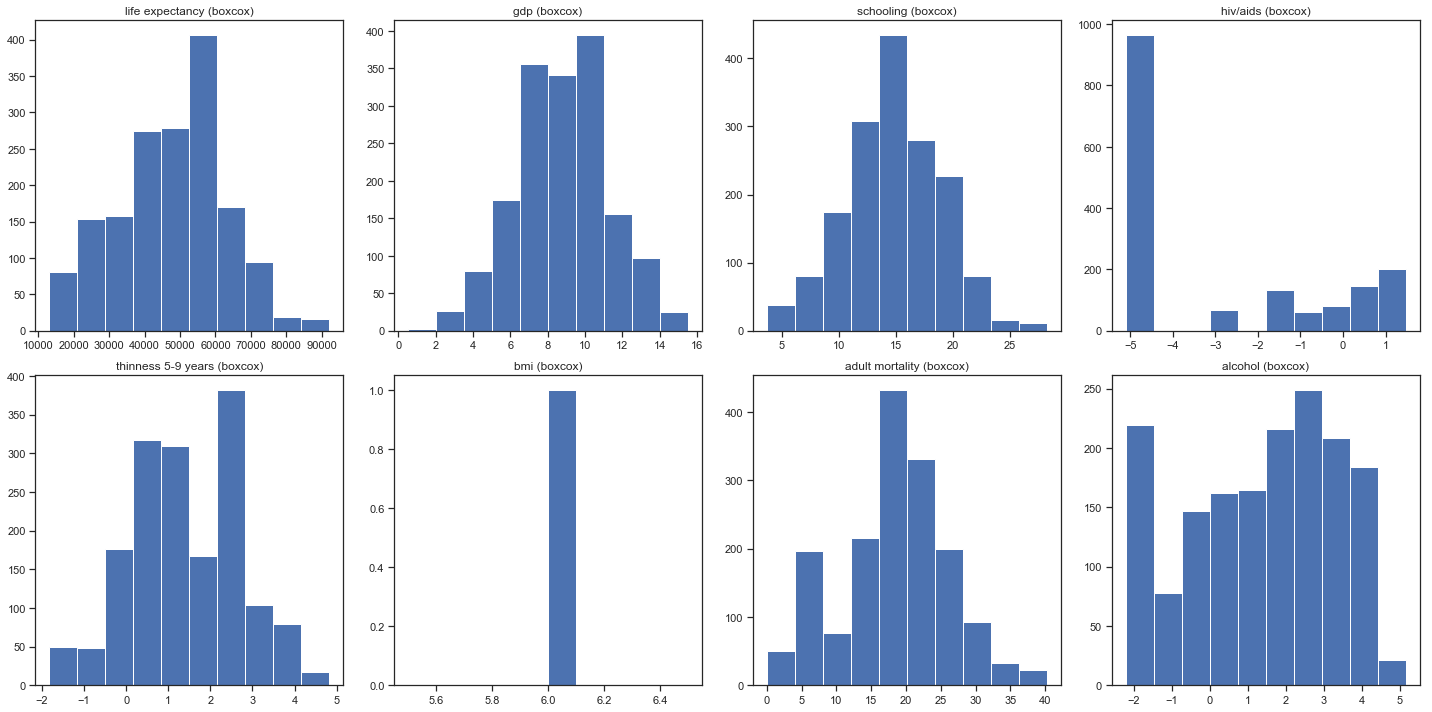

In [21]:
from scipy.stats import boxcox

# boxcox 
life_exp_boxcox,_ = boxcox(df_1["life expectancy"])
gdp_boxcox,_ = boxcox(df_1["gdp"])
schooling_boxcox,_ = boxcox(df_1["schooling"])
aids_boxcox,_ = boxcox(df_1['hiv/aids'])
thinness_boxcox,_ = boxcox(df["thinness 5-9 years"])
bmi_boxcox,_ = boxcox(df_1["bmi"])
adult_mort_boxcox,_ = boxcox(df_1["adult mortality"])
alcohol_boxcox,_ = boxcox(df_1["alcohol"])

# histogram boxcox
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.hist(life_exp_boxcox)
plt.title("life expectancy (boxcox)")

plt.subplot(2,4,2)
plt.hist(gdp_boxcox)
plt.title("gdp (boxcox)")

plt.subplot(2,4,3)
plt.hist(schooling_boxcox)
plt.title("schooling (boxcox)")

plt.subplot(2,4,4)
plt.hist(aids_boxcox)
plt.title("hiv/aids (boxcox)")

plt.subplot(2,4,5)
plt.hist(thinness_boxcox)
plt.title("thinness 5-9 years (boxcox)")

plt.subplot(2,4,6)
plt.hist(6)
plt.title("bmi (boxcox)")

plt.subplot(2,4,7)
plt.hist(adult_mort_boxcox)
plt.title("adult mortality (boxcox)")

plt.subplot(2,4,8)
plt.hist(alcohol_boxcox)
plt.title("alcohol (boxcox)")

plt.tight_layout()
plt.show()

In [22]:
# JB test for normality of original variables, log transformed, boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest

# original variables
jb_stats = jarque_bera(df_1["life expectancy"])
print("life expectancy JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(df_1["gdp"])
print("gdp JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(df_1["schooling"])
print("schooling JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(df_1["hiv/aids"])
print("hiv/aids JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(df_1["thinness 5-9 years"])
print("thinness 5-9 years JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(df_1["bmi"])
print("bmi JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(df_1["adult mortality"])
print("adult mortality JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(df_1["alcohol"])
print("alcohol JB test stat: {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

print(100*'-')

# ----------------------------------------------------------------------------------------------------------

# log transformed variables
jb_stats = jarque_bera(log_life_exp)
print("life expectancy JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(log_gdp)
print("gdp JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(log_schooling)
print("schooling JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(log_aids)
print("hiv/aids JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(log_thinness)
print("thinness 5-9 years JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(log_bmi)
print("bmi JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(log_adult_mort)
print("adult mortality JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(log_alcohol)
print("alcohol JB test stat (log): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

print(100*'-')

# -----------------------------------------------------------------------------------------------------------

# boxcox transformed variables
jb_stats = jarque_bera(life_exp_boxcox)
print("life expectancy JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(gdp_boxcox)
print("gdp JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(schooling_boxcox)
print("schooling JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(aids_boxcox)
print("hiv/aids JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(thinness_boxcox)
print("thinness 5-9 years JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(bmi_boxcox)
print("bmi JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(adult_mort_boxcox)
print("adult mortality JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

jb_stats = jarque_bera(alcohol_boxcox)
print("alcohol JB test stat (boxcox): {0} /// p value: {1}".format(jb_stats[0], jb_stats[1]))

life expectancy JB test stat: 108.54592902688941 /// p value: 0.0
gdp JB test stat: 59184.12294944455 /// p value: 0.0
schooling JB test stat: 4.627031261128933 /// p value: 0.09891289836915096
hiv/aids JB test stat: 59369.11257485804 /// p value: 0.0
thinness 5-9 years JB test stat: 2349.1130047017805 /// p value: 0.0
bmi JB test stat: 125.7923551141542 /// p value: 0.0
adult mortality JB test stat: 839.4437555204358 /// p value: 0.0
alcohol JB test stat: 144.5701658755888 /// p value: 0.0
----------------------------------------------------------------------------------------------------
life expectancy JB test stat (log): 286.29883022514383 /// p value: 0.0
gdp JB test stat (log): 14.847292799579142 /// p value: 0.0005969683865719722
schooling JB test stat (log): 360.2932099058568 /// p value: 0.0
hiv/aids JB test stat (log): 539.5288391388195 /// p value: 0.0
thinness 5-9 years JB test stat (log): 142.77427512943504 /// p value: 0.0
bmi JB test stat (log): 697.8971818553791 /// p v

According to the JB tests, boxcox brings four variables (life expectancy, gdp, schooling, and adult mortality) into normal distribution and the rest of the variables closer to normal than either leaving them untouched or log transforming them. I will transform the dataframe using boxcox.

In [23]:
# transform features to boxcox
df_1["life expectancy"] = life_exp_boxcox.copy()
df_1["gdp"] = gdp_boxcox
df_1["schooling"] = schooling_boxcox
df_1['hiv/aids'] = aids_boxcox
df["thinness 5-9 years"] = thinness_boxcox
df_1["bmi"] = bmi_boxcox
df_1["adult mortality"] = adult_mort_boxcox
df_1["alcohol"] = alcohol_boxcox

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

-------------------------

3. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA
X = df_1[['gdp', 'schooling','hiv/aids','thinness 5-9 years', 'bmi', 'adult mortality', 'alcohol']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=7)
pca_1 = sklearn_pca.fit_transform(X)

print('The percentage of total variance in the dataset explained by each component.\n',
        sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component.
 [0.49448683 0.14559729 0.10990518 0.08505266 0.06790933 0.05915697
 0.03789173]


The first four components account for about 85% of the variance in the dataset.

In [25]:
df_1['pca_1'] = pca_1[:,0]
df_1['pca_2'] = pca_1[:,1]
df_1['pca_3'] = pca_1[:,2]
df_1['pca_4'] = pca_1[:,3]

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

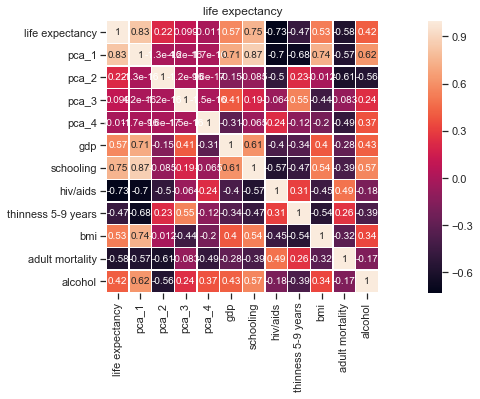

In [26]:
# correlation matrix
corr_life = df_1[['life expectancy', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'gdp', 'schooling', 'hiv/aids',
                'thinness 5-9 years', 'bmi', 'adult mortality', 'alcohol']].corr()

plt.figure(figsize=(18,5))

sns.heatmap(corr_life, square=True, annot=True, linewidths=.5)
plt.title("life expectancy")

plt.show()

------------------------------

4. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

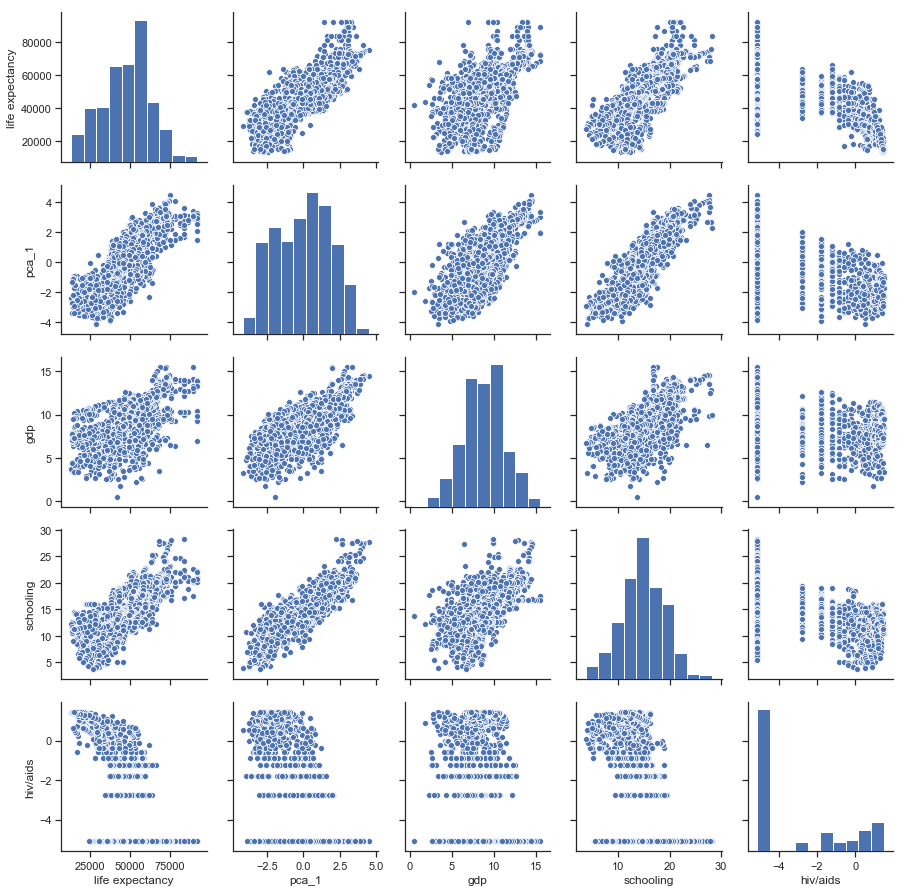

In [27]:
# pairplot target variable, pca 1, top three features
sns.pairplot(df_1[['life expectancy', 'pca_1', 'gdp', 'schooling', 'hiv/aids']])
plt.show()

SUMMARY

When I first loaded the dataset, there were some inconsistencies and extra spaces in the column names. These were corrected and the columns reordered into a more intuitive grouping.

There was also some data missing, mainly in the categories of GDP, population, and hepatitis b. The percentage missing ranged from 15-22%. The most likely explanation for the null values is not recording or input error. It is most likely the result of tiny, fringe countries not reporting that kind of data. For this reason it would not make sense to fill in the null values using th mean or interpolation methods. All null values were dropped from the dataset.

Noticeable outliers appeared in the gdp and hiv/aids variables. They did not seem random or rare. Outliers were uniform and consistent outside of whisker. These could provide some valuable info to the feature. Kept outliers in place. 

After fixing typos, dropping null values, and checking for outliers, I plotted a correlation matrix. From here I eliminated any feature that had a low or close to zero correlation with the target variable life expectancy. Then there were three groups of two variables that were similarly correlated with the target variable but also highly correlated with each other. In each group I kept the feature that was more highly correlated with life expectancy and dropped the other feature, further narrowing that pool from six to three features.

There were now seven variables left (plus the target variable life expectancy) from the original twenty variables in the dataset: gdp, schooling, hiv/aids, thinness 5-9 years, bmi, adult mortality, and alcohol.

From here PCA was applied. The first three features accounted for roughly 75% of the variance in the dataset. I'd like this number to be a bit higher, so I included the fourth feature and brought the variance up to around 85%.

Then I plotted a correlation matrix including the PCA features. PCA 1 was the most correlated with the target variable out of all the features at 83%. This will be the final feature. 

-----------------------------------

WHAT VARIABLES EXTEND LIFE EXPECTANCY?

According to the data, the gdp of the country you live in and the amount of schooling you complete have the most positive correlation with life expectancy compared to the other variables in this dataset. This may require some inferrence for broader context. 

On the surface, simply having money or a high gdp does not make you healthier, and being poor does not necessarily equate to bad health. Looking deeper though, the more a country's wealth increases, the more money they have available to spend on their medical industry, hospitals, equipment, doctor training, etc.

The same thing applies to schooling. Being smart does mean you're healthy, and being dumb does not imply bad health. However, schooling does imply a good paying job. The more schooling the higher your earnings potential. The higher your earnings the better healthcare you can afford. When health problems do arise, the person with more schooling will most likely be able to address and pay for the problem, which can increase life expectancy overall.